# Trends

Observable Trend 1: It appears that maximum temperature in the cities that were checked increases from -60 degrees latitude until about 20 degrees latitude then the temperature begins to decrease from 20 degrees latitude until 80 degrees. This displays that it is actually north of the equator where max temperature is highest.

Observable Trend 2: It appears that most cities within the -60 to 80 degree latitude range have greater that 60% humidity in August. It is possible based on the City Latitude vs. Humidity scatter plot that the cities that fall between 20 and 40 degrees latitude are less humid.

Observable Trend 3: It appears that cities fall outside of the 0 to 20 degree latitude range are more likely to have no clouds than those that fall in the 0 to 20 degree latitude range.
ge.

# Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
units = "imperial"

# Lists for holding values from API calls
lat = []
max_temp = []
humidity_pct = []
cloudiness_pct = []
wind_speed_mph = []
city_id = []

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
for city in cities:
    params = {
        "q": city,
             }
    try:
        response = requests.get(url, params=params)
        response_json = response.json()
        lat.append(response_json["coord"]["lat"])
        max_temp.append(response_json["main"]["temp_max"])
        humidity_pct.append(response_json["main"]["humidity"])
        cloudiness_pct.append(response_json["clouds"]["all"])
        wind_speed_mph.append(response_json["wind"]["speed"])
        city_id.append(response_json["id"])
    except KeyError:
        print("KeyError...Skipping")
# Make a request for each of ciy's name, id, url and run processing record order.
try:
    for x in range(len(cities)):
        print(f"Processing Record: {x} for city: {cities[x]}, city ID: {city_id[x]}, {url}")
except IndexError:
        print("IndexError...Skipping")

KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping
KeyError...Skipping


In [4]:
len(lat)

568

In [5]:
len(humidity_pct)

568

In [6]:
len(max_temp)

568

In [7]:
len(cloudiness_pct)

568

In [8]:
len(wind_speed_mph)

568

In [9]:
#build pandas dataframe
weather_dict = {
    "lat": lat,
    "temp": max_temp,
    "Humidity": humidity_pct,
    "Cloudiness": cloudiness_pct,
    "Wind Speed": wind_speed_mph
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,lat,temp,Humidity,Cloudiness,Wind Speed
0,20.93,74.60,91,64,2.39
1,-34.42,42.74,100,92,10.22
2,-21.80,52.46,62,0,10.00
3,34.92,78.80,78,40,2.24
4,-23.87,68.00,94,0,9.10


# Temperature (F) vs. Latitude

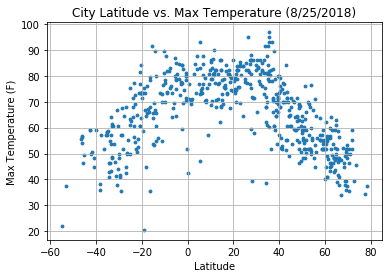

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o", s=8)

# Create labels for the X and Y axis
plt.title("City Latitude vs. Max Temperature (8/25/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save an image of our scatterplot
plt.savefig("../Images/temp_vs_lat.png")

# Display Scatter plot
plt.show()

# Humidity (%) vs. Latitude

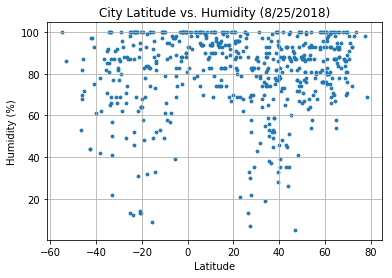

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["Humidity"], marker="o", s=8)

# Create labels for the X and Y axis
plt.title("City Latitude vs. Humidity (8/25/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save an image of our scatterplot
plt.savefig("../Images/humidity_vs_lat.png")

# Display Scatter plot
plt.show()

# Cloudiness (%) vs. Latitude

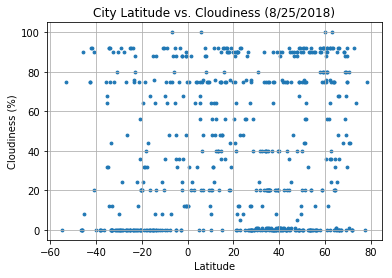

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["Cloudiness"], marker="o", s=8)

# Create labels for the X and Y axis
plt.title("City Latitude vs. Cloudiness (8/25/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save an image of our scatterplot
plt.savefig("../Images/cloudiness_vs_lat.png")

# Display Scatter plot
plt.show()

# Wind Speed (mph) vs. Latitude

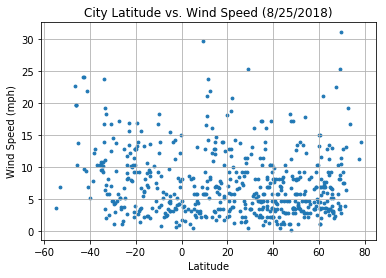

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["Wind Speed"], marker="o", s=8)

# Create labels for the X and Y axis
plt.title("City Latitude vs. Wind Speed (8/25/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save an image of our scatterplot
plt.savefig("../Images/wind_speed_vs_lat.png")

# Display Scatter plot
plt.show()